# Classification 
## Using SMOTE 

In [7]:
import numpy as np
import pandas as pd
import json 
import imblearn

In [8]:
from sklearn.manifold import Isomap, TSNE, MDS, LocallyLinearEmbedding
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
from missingpy import MissForest

In [10]:
df = pd.read_json('features_label.json')
df.head(3)

ValueError: Unexpected character found when decoding 'false'

In [5]:
df['class'] = df['class'].astype('category')
df.groupby('class').size()

NameError: name 'df' is not defined

In [6]:
from sklearn import preprocessing
categorical = ['class']
le = preprocessing.LabelEncoder()
df[categorical] = df[categorical].apply(lambda series: pd.Series(
    le.fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
))

NameError: name 'df' is not defined

In [7]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [8]:
oversample = SMOTE()
X, y = oversample.fit_resample(df.loc[df['class'].notnull()].reset_index(), df.loc[df['class'].notnull(),'class'])
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0.0: 9974, 1.0: 9974, 2.0: 9974})


In [9]:
len(pd.unique(X['index']))

19934

In [10]:
X.groupby('class').size()

class
0.0    9974
1.0    9974
2.0    9974
dtype: int64

In [11]:
X.head()

,index,0,1,2,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,class
0,154175,-0.289675,0.394769,0.256888,-0.317372,-0.237715,0.167305,-0.198700,0.171249,-0.033327,...,0.001391,0.840816,0.179573,0.485714,0.288557,1,1.000000,3.951378,0.000000,0.0
1,154177,-0.203194,0.273622,0.243855,-0.281782,0.095889,0.274552,-0.137389,0.273008,-0.054578,...,0.000026,0.697470,0.240055,0.495575,0.288664,1,1.000000,3.457491,0.000000,0.0
2,154179,-0.112905,0.204361,0.368729,-0.302603,-0.023144,0.152470,-0.110966,0.133138,-0.068070,...,-0.000165,0.652331,0.247898,0.494681,0.288659,1,1.000000,3.258881,0.000000,0.0
3,154180,-0.165507,0.221519,0.352529,-0.249288,-0.080767,0.211572,-0.242924,0.189266,-0.148492,...,-0.000314,0.691111,0.241398,0.491667,0.288635,2,0.983333,3.456722,0.016667,0.0
4,154186,-0.225182,0.188634,0.405607,-0.091972,-0.033343,0.101976,-0.136606,0.192652,-0.094230,...,-0.000344,0.713955,0.229247,0.495283,0.288662,3,0.981132,3.583734,0.018868,0.0


In [12]:
a = df.loc[df['class'].isnull()].reset_index()

In [13]:
overSampled = pd.concat([X,a]).set_index('index')

In [14]:
overSampled.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,class
index,,,,,,,,,,,,,,,,,,,,,
154175,-0.289675,0.394769,0.256888,-0.317372,-0.237715,0.167305,-0.198700,0.171249,-0.033327,-0.001526,...,0.001391,0.840816,0.179573,0.485714,0.288557,1,1.000000,3.951378,0.000000,0.0
154177,-0.203194,0.273622,0.243855,-0.281782,0.095889,0.274552,-0.137389,0.273008,-0.054578,0.027165,...,0.000026,0.697470,0.240055,0.495575,0.288664,1,1.000000,3.457491,0.000000,0.0
154179,-0.112905,0.204361,0.368729,-0.302603,-0.023144,0.152470,-0.110966,0.133138,-0.068070,-0.022307,...,-0.000165,0.652331,0.247898,0.494681,0.288659,1,1.000000,3.258881,0.000000,0.0
154180,-0.165507,0.221519,0.352529,-0.249288,-0.080767,0.211572,-0.242924,0.189266,-0.148492,-0.037466,...,-0.000314,0.691111,0.241398,0.491667,0.288635,2,0.983333,3.456722,0.016667,0.0
154186,-0.225182,0.188634,0.405607,-0.091972,-0.033343,0.101976,-0.136606,0.192652,-0.094230,0.021252,...,-0.000344,0.713955,0.229247,0.495283,0.288662,3,0.981132,3.583734,0.018868,0.0


## Apply Missfores

In [15]:
%%time

imputer = MissForest(random_state=42, class_weight='balanced')
imputed = imputer.fit_transform(overSampled, cat_vars=119)
imputed

Iteration: 0
Iteration: 1
Iteration: 2
CPU times: user 4min 39s, sys: 1.02 s, total: 4min 40s
Wall time: 39.3 s


array([[-0.28967483,  0.39476911,  0.25688809, ...,  3.95137796,
         0.        ,  0.        ],
       [-0.20319405,  0.27362184,  0.24385467, ...,  3.45749102,
         0.        ,  0.        ],
       [-0.11290469,  0.20436135,  0.36872937, ...,  3.25888057,
         0.        ,  0.        ],
       ...,
       [-0.11628602,  0.29573326,  0.40448253, ...,  4.0708538 ,
         0.        ,  1.        ],
       [-0.09307639,  0.14522664,  0.37296448, ...,  3.90355169,
         0.0060241 ,  1.        ],
       [-0.18077336,  0.1715945 ,  0.29286598, ...,  2.947734  ,
         0.00746269,  1.        ]])

In [16]:
cat_cols=['class']
imputed = pd.DataFrame(imputed, columns=overSampled.columns.tolist())

In [17]:
imputed.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,class
0,-0.289675,0.394769,0.256888,-0.317372,-0.237715,0.167305,-0.198700,0.171249,-0.033327,-0.001526,...,0.001391,0.840816,0.179573,0.485714,0.288557,1.0,1.000000,3.951378,0.000000,0.0
1,-0.203194,0.273622,0.243855,-0.281782,0.095889,0.274552,-0.137389,0.273008,-0.054578,0.027165,...,0.000026,0.697470,0.240055,0.495575,0.288664,1.0,1.000000,3.457491,0.000000,0.0
2,-0.112905,0.204361,0.368729,-0.302603,-0.023144,0.152470,-0.110966,0.133138,-0.068070,-0.022307,...,-0.000165,0.652331,0.247898,0.494681,0.288659,1.0,1.000000,3.258881,0.000000,0.0
3,-0.165507,0.221519,0.352529,-0.249288,-0.080767,0.211572,-0.242924,0.189266,-0.148492,-0.037466,...,-0.000314,0.691111,0.241398,0.491667,0.288635,2.0,0.983333,3.456722,0.016667,0.0
4,-0.225182,0.188634,0.405607,-0.091972,-0.033343,0.101976,-0.136606,0.192652,-0.094230,0.021252,...,-0.000344,0.713955,0.229247,0.495283,0.288662,3.0,0.981132,3.583734,0.018868,0.0


In [18]:
imputed.index = overSampled.index

In [19]:
imputed.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,class
index,,,,,,,,,,,,,,,,,,,,,
154175,-0.289675,0.394769,0.256888,-0.317372,-0.237715,0.167305,-0.198700,0.171249,-0.033327,-0.001526,...,0.001391,0.840816,0.179573,0.485714,0.288557,1.0,1.000000,3.951378,0.000000,0.0
154177,-0.203194,0.273622,0.243855,-0.281782,0.095889,0.274552,-0.137389,0.273008,-0.054578,0.027165,...,0.000026,0.697470,0.240055,0.495575,0.288664,1.0,1.000000,3.457491,0.000000,0.0
154179,-0.112905,0.204361,0.368729,-0.302603,-0.023144,0.152470,-0.110966,0.133138,-0.068070,-0.022307,...,-0.000165,0.652331,0.247898,0.494681,0.288659,1.0,1.000000,3.258881,0.000000,0.0
154180,-0.165507,0.221519,0.352529,-0.249288,-0.080767,0.211572,-0.242924,0.189266,-0.148492,-0.037466,...,-0.000314,0.691111,0.241398,0.491667,0.288635,2.0,0.983333,3.456722,0.016667,0.0
154186,-0.225182,0.188634,0.405607,-0.091972,-0.033343,0.101976,-0.136606,0.192652,-0.094230,0.021252,...,-0.000344,0.713955,0.229247,0.495283,0.288662,3.0,0.981132,3.583734,0.018868,0.0


In [20]:
imputed.groupby('class').size()

class
0.0     10242
1.0    158656
2.0     73854
dtype: int64

In [21]:
metadata = pd.read_json('data_and_meta.json')
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232748 entries, 0 to 284530
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   index           232748 non-null  int64 
 1   reviewerID      232748 non-null  object
 2   asin            232748 non-null  object
 3   reviewerName    230910 non-null  object
 4   helpful         232748 non-null  object
 5   reviewText      232748 non-null  object
 6   overall         232748 non-null  int64 
 7   summary         232748 non-null  object
 8   unixReviewTime  232748 non-null  int64 
 9   reviewTime      232748 non-null  object
 10  features        232748 non-null  object
 11  amazonCategory  232748 non-null  object
 12  class           19918 non-null   object
 13  title           106284 non-null  object
 14  description     232748 non-null  object
 15  feature         232748 non-null  object
dtypes: int64(3), object(13)
memory usage: 30.2+ MB


In [22]:
imputed['CLASS'] = le.inverse_transform(imputed['class'].astype(int)[imputed['class'].notnull()])
imputed.groupby('CLASS').size()

CLASS
Q1     10242
Q2    158656
Q4     73854
dtype: int64

In [23]:
imputed

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,class,CLASS
index,,,,,,,,,,,,,,,,,,,,,
154175,-0.289675,0.394769,0.256888,-0.317372,-0.237715,0.167305,-0.198700,0.171249,-0.033327,-0.001526,...,0.840816,0.179573,0.485714,0.288557,1.0,1.000000,3.951378,0.000000,0.0,Q1
154177,-0.203194,0.273622,0.243855,-0.281782,0.095889,0.274552,-0.137389,0.273008,-0.054578,0.027165,...,0.697470,0.240055,0.495575,0.288664,1.0,1.000000,3.457491,0.000000,0.0,Q1
154179,-0.112905,0.204361,0.368729,-0.302603,-0.023144,0.152470,-0.110966,0.133138,-0.068070,-0.022307,...,0.652331,0.247898,0.494681,0.288659,1.0,1.000000,3.258881,0.000000,0.0,Q1
154180,-0.165507,0.221519,0.352529,-0.249288,-0.080767,0.211572,-0.242924,0.189266,-0.148492,-0.037466,...,0.691111,0.241398,0.491667,0.288635,2.0,0.983333,3.456722,0.016667,0.0,Q1
154186,-0.225182,0.188634,0.405607,-0.091972,-0.033343,0.101976,-0.136606,0.192652,-0.094230,0.021252,...,0.713955,0.229247,0.495283,0.288662,3.0,0.981132,3.583734,0.018868,0.0,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232743,-0.186514,0.099457,0.393527,-0.186841,0.037206,0.140150,-0.143451,0.161884,-0.102061,0.058485,...,0.647394,0.252082,0.499289,0.288675,2.0,0.998578,3.321696,0.001422,1.0,Q2
232744,-0.212278,0.177555,0.390303,-0.246410,-0.130181,0.186109,-0.030990,0.232672,-0.103300,0.034690,...,0.784241,0.210243,0.491228,0.288631,2.0,0.982456,3.925651,0.017544,1.0,Q2
232745,-0.116286,0.295733,0.404483,-0.161157,-0.175289,0.202572,-0.013252,0.300210,0.076071,-0.095648,...,0.836601,0.142492,0.490196,0.288620,1.0,1.000000,4.070854,0.000000,1.0,Q2


In [24]:
len(pd.unique(imputed.index))

232748

In [25]:
metadata.set_index('index')

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,features,amazonCategory,class,title,description,feature
index,,,,,,,,,,,,,,,
0,A1JUPR7LPMYG1X,B00009V2QX,"Chef Kim ""My Review""","[0, 0]",Its time for me to purchase another box. great...,4,Great,1356739200,"12 29, 2012","[-0.0987924889, 0.24677984890000002, 0.3721822...",health,None,None,,
1,A6YT8ATZ4SEKT,B00009V2QX,C. Moran,"[0, 0]","Recieved OLD black and silver procell package,...",3,recieved OLD STOCK,1401840000,"06 4, 2014","[-0.07366212, 0.345128, 0.30181372, -0.4765604...",health,None,None,,
2,A0678500JUN3N7KUG4PS,B000056OWW,GigiS,"[0, 0]",The best cold sore remover product I've ever u...,5,Great product.,1403049600,"06 18, 2014","[-0.2395376471, 0.2173122941, 0.3914945765, -0...",health,None,None,,
3,A4DRGD09QEE9I,B00009V2QX,"C. R. Dyer ""home maker""","[0, 0]",If you've ever noticed your flashlights are di...,5,Batteries,1357516800,"01 7, 2013","[-0.2284705294, 0.2700145882, 0.45578470590000...",health,None,None,,
4,ABT4HGNR22RWO,B00009V2QX,Daniel L. Kellett Sr.,"[0, 0]",Received fast and as described. I have only u...,5,Big bang for your buck...,1320105600,"11 1, 2011","[-0.1749965652, 0.2965097391, 0.2584427783, -0...",health,None,None,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232743,AGGAQLXPVGM5D,B002BDU7U2,Eagle Vision,"[13, 14]",WHAT COMES IN THE BOXCaseMicro USB CableInstru...,4,Very good case and battery with a limitation,1250467200,"08 17, 2009","[-0.1865138805, 0.0994569393, 0.39352668090000...",mobile,None,Mophie Juice Pack Air Case and Rechargeable Ba...,The Juice Pack Air is a rechargeable external ...,iPhone case and battery pack protects and adds...
232744,A261FJIRA4ELFV,B002BDU7U2,"Endi ""Endiablado""","[2, 2]","No wonder the price was so low, this battery p...",1,garbage,1301961600,"04 5, 2011","[-0.2122780702, 0.177555193, 0.390302733300000...",mobile,None,Mophie Juice Pack Air Case and Rechargeable Ba...,The Juice Pack Air is a rechargeable external ...,iPhone case and battery pack protects and adds...
232745,AR0XBJRF01FFK,B002BDU7U2,ewang,"[2, 2]","I bought this almost 2 years ago honestly, and...",5,Good backup charger!,1391990400,"02 10, 2014","[-0.1162860196, 0.2957332569, 0.4044825294, -0...",mobile,None,Mophie Juice Pack Air Case and Rechargeable Ba...,The Juice Pack Air is a rechargeable external ...,iPhone case and battery pack protects and adds...


In [26]:
All = pd.merge(imputed,metadata, how='outer', on='index')

In [27]:
All.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242752 entries, 0 to 242751
Data columns (total 137 columns):
 #    Column          Non-Null Count   Dtype  
---   ------          --------------   -----  
 0    index           242752 non-null  int64  
 1    0               242752 non-null  float64
 2    1               242752 non-null  float64
 3    2               242752 non-null  float64
 4    3               242752 non-null  float64
 5    4               242752 non-null  float64
 6    5               242752 non-null  float64
 7    6               242752 non-null  float64
 8    7               242752 non-null  float64
 9    8               242752 non-null  float64
 10   9               242752 non-null  float64
 11   10              242752 non-null  float64
 12   11              242752 non-null  float64
 13   12              242752 non-null  float64
 14   13              242752 non-null  float64
 15   14              242752 non-null  float64
 16   15              242752 non-null  flo

In [28]:
col = [ column for column in All.columns if column not in ['class_y','class_x','reviewerName','features']]
All = All[col]

In [29]:
All.iloc[200000,-13:].values

array(['Q2', 'AE55ZYNOXOERC', 'B00003006E', list([3, 7]),
       'I had no idea what this is/was,, but I bought it.  It works!Good price, excellent service(delivery).',
       4, 'Computer "box"', 1192579200, '10 17, 2007', 'electronics',
       'Cisco-Linksys EZXS55W EtherFast 10/100 5-Port Workgroup Switch',
       "5 PORT ETHERFAST DESKTOP SWITCH The EtherFast 10/100 5-Port Switch provides an easy and flexible way to boost your network's performance while migrating to the power of Fast Ethernet. It is designed to meet the needs of small businesses, medium-size businesses, and small-office/home-office networks, and it allows you to run high-end video, multimedia, and other speed-intensive applications at blistering speeds. With support for half- and full-duplex speeds, the switches allow your network to run at 10 Mbps, 20 Mbps, 100 Mbps, and an incredible 200 Mbps, which provides a cost-effective solution if you ever decide to upgrade your Ethernet network. The EtherFast 10/100 5-Por

In [30]:
All.iloc[230000,-13:].values

array(['Q4', 'A2CTNSIVANWUIH', '0006511252', list([0, 2]),
       "I've been enjoying the Flashman series from my local library, and was looking forwards to the Kindle edition. But 12.99 is just too expensive to make it worthwhile. I'd pay 5.99, but not more. Also, has Kindle figured out how to implement the Notes feature such that it's easy to use? For the print books the notes are key to connecting the fiction and the fact, and you have to be able to easily jump back and forth. Earlier Kindle books weren't too good at this, and I hope that this has been addressed in this series.",
       2, 'A great series, but Kindle price too high', 1365724800,
       '04 12, 2013', 'books', 'The Flashman (The Flashman Papers)',
       "The first instalment of the Flashman Papers sees the fag-roasting rotter from Tom Brown's Schooldays commence his military career as a reluctant secret agent in Afghanistan. Expelled from Rugby for drunkenness, and none too welcome at home after seducing his father'

In [31]:
categorical = ['CLASS']  
le = preprocessing.LabelEncoder()
All['target'] = le.fit_transform(All['CLASS']) 

In [32]:
All['target']

0         0
1         0
2         0
3         0
4         0
         ..
242747    1
242748    1
242749    1
242750    1
242751    1
Name: target, Length: 242752, dtype: int64

In [33]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.manifold import Isomap, TSNE, MDS, LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB

In [34]:
All.groupby('target').size()

target
0     10242
1    158656
2     73854
dtype: int64

## Applying TF-IDF:

In [35]:
%%time

X_ = All['reviewText']
y_ = All['target']

pipe = Pipeline([('vectorizer', CountVectorizer()),  
                 ('tfidf', TfidfTransformer()), 
                 ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

classifier = pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.03      0.05      3308
           1       0.71      1.00      0.83     52448
           2       0.99      0.24      0.39     24353

    accuracy                           0.73     80109
   macro avg       0.90      0.42      0.42     80109
weighted avg       0.81      0.73      0.66     80109

CPU times: user 52.1 s, sys: 241 ms, total: 52.4 s
Wall time: 24.7 s


In [36]:
confusion_matrix(y_test, y_pred)

array([[   92,  3216,     0],
       [    0, 52417,    31],
       [    0, 18538,  5815]])

Confusion matrix, without normalization
[[   92  3216     0]
 [    0 52417    31]
 [    0 18538  5815]]
Normalized confusion matrix
[[2.78113664e-02 9.72188634e-01 0.00000000e+00]
 [0.00000000e+00 9.99408938e-01 5.91061623e-04]
 [0.00000000e+00 7.61220384e-01 2.38779616e-01]]


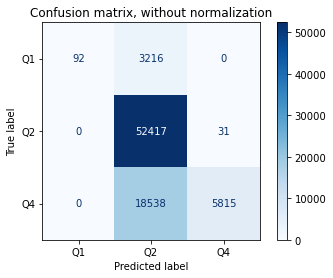

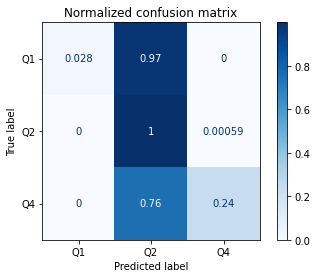

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

class_names= ['Q1','Q2', 'Q4']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Applying features:

In [38]:
from sklearn.ensemble import RandomForestClassifier

X_ =  All.iloc[:,1:120]
y_ = All['target']

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)


classifier = pipe.fit(X_train, y_train)

In [39]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      3308
           1       0.94      0.98      0.96     52448
           2       0.95      0.88      0.92     24353

    accuracy                           0.95     80109
   macro avg       0.97      0.94      0.95     80109
weighted avg       0.95      0.95      0.95     80109



Confusion matrix, without normalization
[[ 3145   163     0]
 [    0 51416  1032]
 [    0  2897 21456]]
Normalized confusion matrix
[[0.95072551 0.04927449 0.        ]
 [0.         0.98032337 0.01967663]
 [0.         0.11895865 0.88104135]]


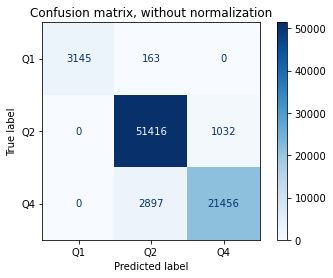

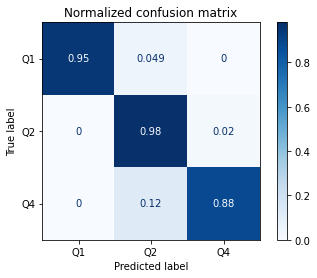

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

class_names= ['Q1','Q2', 'Q4']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()